#### Importing Libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### Loading and analysing dataset

<p>Column Details</p>
<ol>
  <li><b>age</b> - Age in Years</li>
  <li><b>sex</b> - (0 = Female, 1 = Male)</li>
  <li><b>cp</b> - Chest pain type (0, 1, 2, 3)</li>
  <li><b>trestbps</b> - Resting blood pressure in mm Hg</li>
  <li><b>chol</b> - Serum cholestoral in mg/dl</li>
  <li><b>fbs</b> - fasting blood sugar &gt; 120 mg/dl (1 = true; 0 = false)</li>
  <li><b>restecg</b> - Resting electrocardiographic results (0, 1, 2)</li>
  <li><b>thalach</b> - Maximum heart rate achieved</li>
  <li><b>exang</b> - Exercise induced angina (0 = No, 1 = Yes)</li>
  <li><b>oldpeak</b> - ST depression induced by exercise relative to rest</li>
  <li><b>slop</b> - The slope of the peak exercise ST segment</li>
  <li><b>ca</b> - Number of major vessels colored by flourosopy (0 - 3)</li>
  <li><b>thal</b> - (3 = Normal, 6 = Fixed Defect, 7 = Reversable Defect)</li>
  <li><b>target</b> - (0 = No, 1 = Yes)</li>
</ol>

In [2]:
heart_data = pd.read_csv("./data.csv") 

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
heart_data.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
heart_data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
print("Dataset contains", heart_data.shape[1], "features and", heart_data.shape[0], "rows")

Dataset contains 14 features and 303 rows


In [8]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart_data.groupby("target").mean()[["age", "trestbps", "chol", "thalach", "oldpeak"]]

,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507
1,52.496970,129.303030,242.230303,158.466667,0.583030


In [52]:
scaling_cols = ["age", "trestbps", "chol", "thalach"]
scalers = {}
heart_data_scaled = heart_data.copy()

for col in scaling_cols:
    scaler = MinMaxScaler()
    heart_data_scaled[col] = scaler.fit_transform(heart_data[[col]])
    scalers[col] = scaler


In [53]:
heart_data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,2.3,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,3.5,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,1.4,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.8,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.6,2,0,2,1


#### Extracting features and labels

In [54]:
X = heart_data_scaled.iloc[:,:-1].values
y = heart_data_scaled.iloc[:,-1].values

In [55]:
print("Features:\n", X, "\n")
print("Labels:\n", y, "\n")

Features:
 [[0.70833333 1.         3.         ... 0.         0.         1.        ]
 [0.16666667 1.         2.         ... 0.         0.         2.        ]
 [0.25       0.         1.         ... 2.         0.         2.        ]
 ...
 [0.8125     1.         0.         ... 1.         2.         3.        ]
 [0.58333333 1.         0.         ... 1.         1.         3.        ]
 [0.58333333 0.         1.         ... 1.         1.         2.        ]] 

Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

#### Preparing training and testing set

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15, stratify=y)

print("Training Set Size:", len(X_train))
print("Testing Set Size:", len(X_test))

Training Set Size: 257
Testing Set Size: 46


#### Model selection and hyper-parameter tuning using GridSearchCV

In [57]:
models = {
    "svm_linear": {
        "instance": SVC(probability=True, gamma="auto"),
        "params": {
            "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            "kernel": ["linear"]
        }
    },
    "svm_rbf": {
        "instance": SVC(probability=True),
        "params": {
            "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            "kernel": ["rbf"],
            "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
        }
    },
    "logistic_regression": {
        "instance": LogisticRegression(),
        "params": {
            "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        }
    },
    "random_forest": {
        "instance": RandomForestClassifier(),
        "params": {
            "n_estimators": [1, 10, 100, 1000]
        }
    }
}

In [58]:
scores = []
best_estimators = {}

for model_name, config in models.items():
    print("Training", model_name)
    classifier = GridSearchCV(
        estimator=config["instance"],
        param_grid=config["params"],
        cv=5,
        scoring="accuracy"
    )
    
    classifier.fit(X_train, y_train)
    
    scores.append({
        "model" : model_name,
        "train_score" : classifier.best_score_,
        "test_score" : classifier.best_estimator_.score(X_test, y_test),
        "params" : classifier.best_params_
    })
    
    best_estimators[model_name] = classifier.best_estimator_

Training svm_linear
Training svm_rbf
Training logistic_regression
Training random_forest


### Model selection and evaluation

In [59]:
result = pd.DataFrame(scores, columns=["model", "train_score", "test_score", "params"])
result.head()

,model,train_score,test_score,params
0,svm_linear,0.828582,0.847826,"{'C': 1, 'kernel': 'linear'}"
1,svm_rbf,0.840271,0.826087,"{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}"
2,logistic_regression,0.820739,0.847826,{'C': 0.1}
3,random_forest,0.824510,0.869565,{'n_estimators': 100}


In [60]:
result["average_score"] = (result["test_score"] + result["train_score"]) / 2
result.head()

,model,train_score,test_score,params,average_score
0,svm_linear,0.828582,0.847826,"{'C': 1, 'kernel': 'linear'}",0.838204
1,svm_rbf,0.840271,0.826087,"{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}",0.833179
2,logistic_regression,0.820739,0.847826,{'C': 0.1},0.834283
3,random_forest,0.824510,0.869565,{'n_estimators': 100},0.847038


Almost all the estimators have the same average score so we will be selecting logistic regression for simplicity here

In [61]:
model = best_estimators["logistic_regression"]

In [62]:
print("ACCURACY SCORE")
print("Training Set:", accuracy_score(y_true=y_train, y_pred=model.predict(X_train)))
print("Testing Set:", accuracy_score(y_true=y_test, y_pred=model.predict(X_test)))

ACCURACY SCORE
Training Set: 0.8521400778210116
Testing Set: 0.8478260869565217


In [63]:
print("CLASSIFICATION REPORT")
print(classification_report(y_true=y_test, y_pred=model.predict(X_test)))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.82      0.92      0.87        25

    accuracy                           0.85        46
   macro avg       0.86      0.84      0.84        46
weighted avg       0.85      0.85      0.85        46



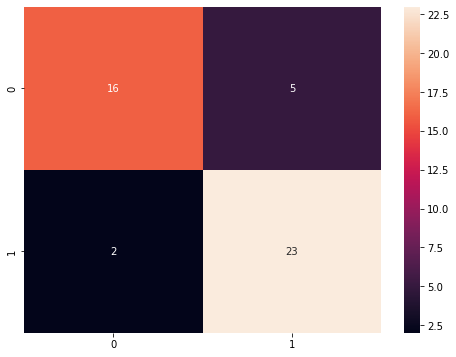

In [64]:
matrix = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))

plt.figure(figsize=(8,6))
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")
sns.heatmap(matrix, annot=True)
plt.show()

### Making predictions

In [72]:
predictions = pd.DataFrame(X_test, columns=["age","sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"] )

predictions["Real Target"] = y_test
predictions["Predicted Type"] = model.predict(X_test)

predictions.to_csv("test_prediction_result.csv", index=False)

predictions.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Real Target,Predicted Type
0,0.520833,1.0,1.0,0.132075,0.417808,0.0,1.0,0.648855,0.0,0.0,2.0,0.0,3.0,1,1
1,0.416667,1.0,2.0,0.226415,0.052511,0.0,0.0,0.419847,0.0,0.8,2.0,3.0,2.0,0,1
2,0.333333,1.0,0.0,0.094340,0.187215,0.0,0.0,0.587786,1.0,3.0,1.0,0.0,2.0,1,0
3,0.333333,0.0,1.0,0.339623,0.246575,0.0,0.0,0.793893,0.0,0.6,1.0,0.0,2.0,1,1
4,0.562500,0.0,0.0,1.000000,0.369863,1.0,0.0,0.473282,1.0,4.0,0.0,2.0,3.0,0,0
5,0.687500,0.0,0.0,0.415094,0.383562,1.0,1.0,0.267176,0.0,1.9,1.0,3.0,2.0,0,0
6,0.166667,0.0,2.0,0.245283,0.203196,0.0,1.0,0.755725,0.0,0.0,2.0,0.0,2.0,1,1
7,0.208333,1.0,0.0,0.226415,0.212329,0.0,1.0,0.526718,0.0,1.2,1.0,0.0,3.0,0,0
8,0.479167,0.0,2.0,0.396226,0.159817,0.0,0.0,0.748092,0.0,0.1,1.0,0.0,2.0,1,1
9,0.520833,1.0,0.0,0.264151,0.365297,0.0,0.0,0.343511,1.0,3.2,1.0,2.0,2.0,0,0
